### Data import

In [30]:
import pandas as pd
import sys

data = pd.read_json('reviews_nubank.json')
data.loc[:,["text"]]

,text
0,O app ate que e bom.Acho ruim so pra cadastrar...
1,Por favor alguém pode me ajudar? Faz um mês qu...
2,Muito bom o app só me estresso as vezes sobre ...
3,"É prático de usar, porém muitas vezes tenho di..."
4,Ganhei um novo celular do meu namorado e desin...
5,Desde mês passado o app toda vez q entro ou vo...
6,Péssimo não tenho mais acesso à minha conta fi...
7,Cheio de falhas. 2 meses que não consigo acess...
8,"A Caixa Econômica sempre foi boa, porém após a..."
9,"Toda hora dá senha errada, sendo que uso a mes..."


### Cleaning text

In [31]:
import spacy
import re
import unicodedata

def setup_abbr():
    file = open("abbr_portuguese.txt", encoding='utf-8')
    abbr_dict = {}

    for line in file:
        w = line.split(";")
        abbr_dict[w[0]] = w[1].replace("\n", "")
    file.close()

    return abbr_dict

def clean(data):
    doc = nlp(data)
    doc_lower = doc.text.lower()
    doc_without_emoji = emoji_pattern.sub(r'', doc_lower)
    doc_punctuation = u"".join([c for c in unicodedata.normalize('NFKD', doc_without_emoji) if not unicodedata.combining(c)])
    doc_corrected = nlp(" ".join([abbr_dict.get(w, w) for w in doc_punctuation.split()]))
    
    return doc_corrected.text

nlp = spacy.load('pt_core_news_sm')
abbr_dict = setup_abbr()
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

data['cleaned_reviews'] = data['text'].apply(clean)
data.loc[:,["cleaned_reviews"]]

,cleaned_reviews
0,o aplicativo ate que e bom.acho ruim so pra ca...
1,por favor alguem pode me ajudar? faz um mes qu...
2,muito bom o aplicativo so me estresso as vezes...
3,"e pratico de usar, porem muitas vezes tenho di..."
4,ganhei um novo celular do meu namorado e desin...
5,desde mes passado o aplicativo toda vez que en...
6,pessimo nao tenho mais acesso a minha conta fi...
7,cheio de falhas. 2 meses que nao consigo acess...
8,"a caixa economica sempre foi boa, porem apos a..."
9,"toda hora da senha errada, sendo que uso a mes..."


### Tagging

In [32]:
import joblib
from nltk import word_tokenize

def wordTag(text):
    tagger = joblib.load('POS_tagger_brill.pkl')
    text = tagger.tag(word_tokenize(text))
    return text
 
data['tag_reviews'] = data['cleaned_reviews'].apply(wordTag)
data.loc[:,["cleaned_reviews", "tag_reviews"]]

,cleaned_reviews,tag_reviews
0,o aplicativo ate que e bom.acho ruim so pra ca...,"[(o, ART), (aplicativo, N), (ate, N), (que, PR..."
1,por favor alguem pode me ajudar? faz um mes qu...,"[(por, PREP), (favor, PREP), (alguem, V), (pod..."
2,muito bom o aplicativo so me estresso as vezes...,"[(muito, ADV), (bom, ADJ), (o, ART), (aplicati..."
3,"e pratico de usar, porem muitas vezes tenho di...","[(e, KC), (pratico, V), (de, PREP), (usar, V),..."
4,ganhei um novo celular do meu namorado e desin...,"[(ganhei, V), (um, ART), (novo, ADJ), (celular..."
5,desde mes passado o aplicativo toda vez que en...,"[(desde, PREP), (mes, N), (passado, PCP), (o, ..."
6,pessimo nao tenho mais acesso a minha conta fi...,"[(pessimo, ADJ), (nao, ADV), (tenho, V), (mais..."
7,cheio de falhas. 2 meses que nao consigo acess...,"[(cheio, ADJ), (de, PREP), (falhas, N), (., .)..."
8,"a caixa economica sempre foi boa, porem apos a...","[(a, ART), (caixa, N), (economica, ADJ), (semp..."
9,"toda hora da senha errada, sendo que uso a mes...","[(toda, PROADJ), (hora, N), (da, N), (senha, N..."


### Tokenization

In [33]:
import nltk
from nltk.tokenize import word_tokenize

def tokenize(text):
    text = word_tokenize(text)
    return text

data['tokenized_reviews'] = data['cleaned_reviews'].apply(tokenize)
data.loc[:,["tokenized_reviews"]]

,tokenized_reviews
0,"[o, aplicativo, ate, que, e, bom.acho, ruim, s..."
1,"[por, favor, alguem, pode, me, ajudar, ?, faz,..."
2,"[muito, bom, o, aplicativo, so, me, estresso, ..."
3,"[e, pratico, de, usar, ,, porem, muitas, vezes..."
4,"[ganhei, um, novo, celular, do, meu, namorado,..."
5,"[desde, mes, passado, o, aplicativo, toda, vez..."
6,"[pessimo, nao, tenho, mais, acesso, a, minha, ..."
7,"[cheio, de, falhas, ., 2, meses, que, nao, con..."
8,"[a, caixa, economica, sempre, foi, boa, ,, por..."
9,"[toda, hora, da, senha, errada, ,, sendo, que,..."


### Stemming

In [34]:
import nltk
from nltk.stem import RSLPStemmer

def stemming(text):
    stemmer = RSLPStemmer()
    phrase = []
    for word in text:
        phrase.append(stemmer.stem(word))
    return phrase

data['stem_reviews'] = data['tokenized_reviews'].apply(stemming)
data.loc[:,["stem_reviews"]]

,stem_reviews
0,"[o, aplic, ate, que, e, bom.ach, ruim, so, pra..."
1,"[por, favor, algu, pod, me, ajud, ?, faz, um, ..."
2,"[muit, bom, o, aplic, so, me, estress, as, vez..."
3,"[e, pra, de, us, ,, por, muit, vez, tenh, difi..."
4,"[ganh, um, nov, celul, do, meu, namor, e, desi..."
5,"[desd, me, pass, o, aplic, tod, vez, que, entr..."
6,"[pess, nao, tenh, mais, acess, a, minh, cont, ..."
7,"[chei, de, falh, ., 2, mes, que, nao, consig, ..."
8,"[a, caix, econom, sempr, foi, boa, ,, por, apo..."
9,"[tod, hor, da, senh, err, ,, send, que, uso, a..."


### Stopwords remove

In [35]:
import nltk
from nltk.corpus import stopwords

def stopwordsRemove(text):
    stop_words = stopwords.words('portuguese')
    phrase = []
    for word in text:
        if word not in stop_words:
            phrase.append(word)
    return phrase

data['stopwords_reviews'] = data['stem_reviews'].apply(stopwordsRemove)
data.loc[:,["stopwords_reviews"]]

,stopwords_reviews
0,"[aplic, ate, bom.ach, ruim, so, pra, cadastr, ..."
1,"[favor, algu, pod, ajud, ?, faz, nao, consig, ..."
2,"[muit, bom, aplic, so, estress, vez, sobr, sen..."
3,"[pra, us, ,, muit, vez, tenh, dificuldad, aces..."
4,"[ganh, nov, celul, namor, desinstal, aplic, ou..."
5,"[desd, pass, aplic, tod, vez, entr, vou, olh, ..."
6,"[pess, nao, tenh, acess, minh, cont, fic, mand..."
7,"[chei, falh, ., 2, mes, nao, consig, acess, mi..."
8,"[caix, econom, sempr, boa, ,, apo, auxili, eme..."
9,"[tod, hor, senh, err, ,, send, uso, mesm, senh..."


### Lemmatizer

In [36]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    lemma = " "
    for word in text:
        lemma = wordnet_lemmatizer.lemmatize(word)
        
    return lemma

data['lemma_reviews'] = data['stopwords_reviews'].apply(lemmatize)
data.loc[:,["lemma_reviews"]]

,lemma_reviews
0,!
1,.
2,.
3,.
4,.
5,.
6,palhac
7,aplic
8,.
9,.


### Phrase junction

In [37]:
def juction(text):
    phrase = []
    for word in text:
        phrase.append(word)
    
    phraseStr = ' '.join(phrase)
    return phraseStr

data['junction'] = data['stopwords_reviews'].apply(juction)
data.loc[:,["junction"]]

,junction
0,aplic ate bom.ach ruim so pra cadastr senh ele...
1,favor algu pod ajud ? faz nao consig acess min...
2,muit bom aplic so estress vez sobr senh eletro...
3,"pra us , muit vez tenh dificuldad acess dev fi..."
4,ganh nov celul namor desinstal aplic outr apar...
5,desd pass aplic tod vez entr vou olh sald apre...
6,pess nao tenh acess minh cont fic mand ir caix...
7,chei falh . 2 mes nao consig acess minh cont e...
8,"caix econom sempr boa , apo auxili emerg pior ..."
9,"tod hor senh err , send uso mesm senh sempr . ..."


### Word Cloud

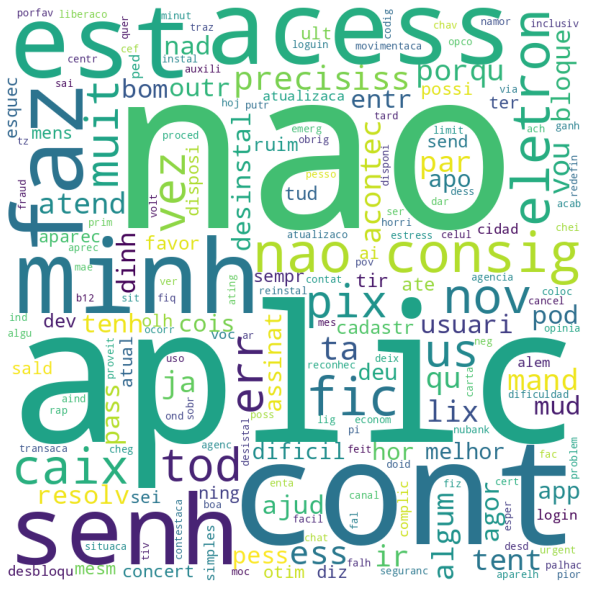

In [38]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)
stopwords.update(["a", "e", "i", "o", "u", "da", "em", "meu", "minha", "mais", "menos", "você", "de", "ao", "os", "para", "vai", "sim", "não", "que", "eu", "ele", "ela", "pra", "pro", "na", "no", "muito"])

# iterate through the json file
for val in data['junction']:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


### Information extraction

In [39]:
import spacy
from spacy.matcher import PhraseMatcher

nlp = spacy.load('pt_core_news_sm')

def informationExtraction(text):
    evaluations = []
    doc = nlp(text)
    
    securityTerms = ['segur', 'roub', 'clon', 'senh', 'acess']
    patterns = [nlp(term) for term in securityTerms]
    
    #Ver utilização do add_patterns juntamente com o entity_ruler (otimização)
    matcher = PhraseMatcher(nlp.vocab) 
    matcher.add("SECURITY_PATTERN", patterns)
    
    matches = matcher(doc)
    
    for i in range(0,len(matches)):
        token = doc[matches[i][1]:matches[i][2]]
        evaluations.append(str(token))
            
    return evaluations

data['extracted_reviews'] = data['junction'].apply(informationExtraction)

In [40]:
for i in range(len(data)):
    if len(data.loc[i,'extracted_reviews'])!=0:
        print(data.loc[i,'cleaned_reviews'])

o aplicativo ate que e bom.acho ruim so pra cadastrar senha eletronica do pix.deveria resolver no aplicativo sem precisar ir na agencia.tirando isso tudo certo!
por favor alguem pode me ajudar? faz um mes que nao consigo acessar minha conta so da erro 02 20 e quando tento fazer um novo usuario ficar aparecendo erro 403. eu ja liguei na central e nao resolvem e ja desistalei o aplicativo e nada. por favor preciso usar o aplicativo e essa nao e a primeira vez que isso acontece.
muito bom o aplicativo so me estresso as vezes sobre a senha eletronica . quero mudar porque esqueci e nao posso dar senha bloqueada .. sei que e uma seguranca , mais se e a pessoa que estar usando concerteza quer mudar porque esqueci .
e pratico de usar, porem muitas vezes tenho dificuldade de acesso devido ficar fora do ar, quando tento acessar diz que nao foi possivel e manda tentar mais tarde.
ganhei um novo celular do meu namorado e desinstalei o aplicativo do outro aparelho, agora nao consigo ter acesso com 